# Assignment_4 DT

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

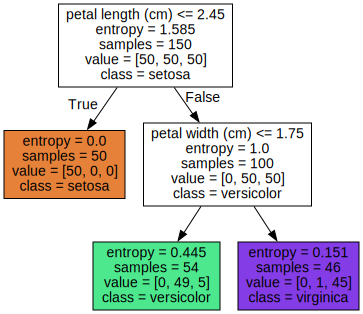

In [3]:
# Answer:
from graphviz import Source
from sklearn.tree import export_graphviz


export_graphviz(tree_clf, out_file="tree.dot", class_names=iris.target_names,feature_names=iris.feature_names[2:], impurity=True, filled=True)

with open("tree.dot") as tree:
    graph = tree.read()
    
Source(graph)

## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

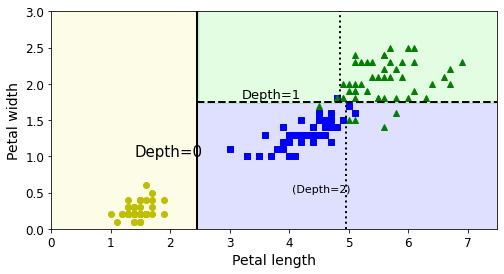

In [5]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1. for a tree of max_depth = 1, the root node has entropy of 1.585!! this value was calculated using log to the base 2 instead of log to the base 3!! and this node checks whether petal length of flower is less than or equal 2.45 or not. if petal length <= 2.45, the model would classify this flower as iris setosa and this node has entropy of 0, if the petal length >2.45 the model would classify the flower as iris versicolor and this node has entropy of 1 because this node has equal number of observations for 2 classes iris versicolor and iris virginica. 

2. - for the tree of max_depth = 1, the tree classify iris setosa perfectly but it classify iris virginica as iris versicolor. So, this tree underfits the training data
   - for the tree of max_depth = 2, the tree classify iris setosa perfectly and it can differentiate between iris versicolor and iris virginica. So, this model fits the training data well
   - for the tree of max_depth = 10, the tree classify iris setosa perfectly and the model overfits the training data 

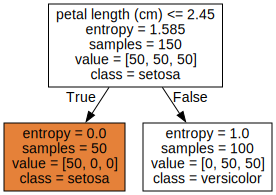

In [6]:
####### YOUR CODE HERE
tree_clf_depth1 = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_clf_depth1.fit(X, y)

export_graphviz(tree_clf_depth1, out_file="tree_depth1.dot", class_names=iris.target_names,feature_names=iris.feature_names[2:], impurity=True, filled=True)

with open("tree_depth1.dot") as tree:
    graph_depth1 = tree.read()
    
Source(graph_depth1)

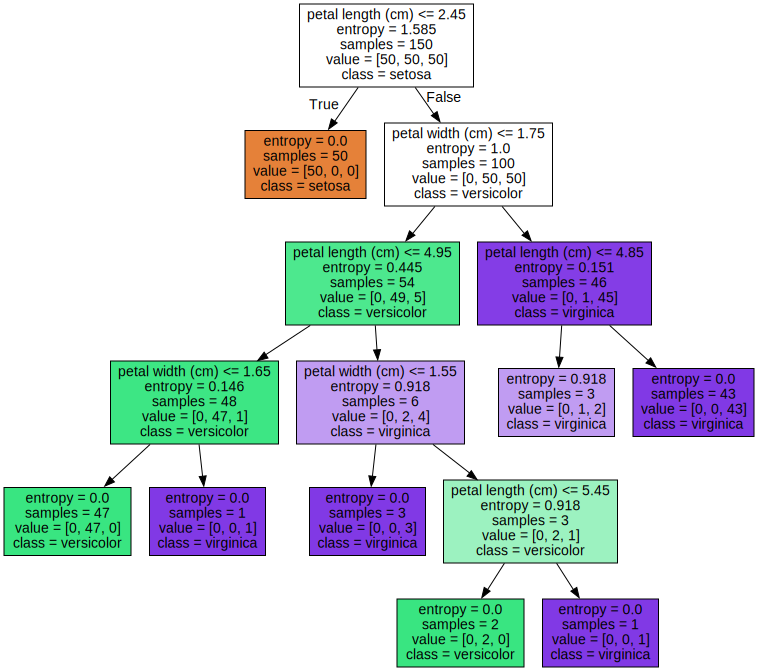

In [7]:
tree_clf_depth10 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_clf_depth10.fit(X, y)

export_graphviz(tree_clf_depth10, out_file="tree_depth10.dot", class_names=iris.target_names,feature_names=iris.feature_names[2:], impurity=True, filled=True)

with open("tree_depth10.dot") as tree:
    graph_depth10 = tree.read()
    
Source(graph_depth10)

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. - for iris setosa: 0/54 = 0
   - for iris versicolor: 49/54 = 0.9074
   - for iris virginica: 5/54 = 0.0925

In [8]:
######### Your code for (2.)
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

0.96


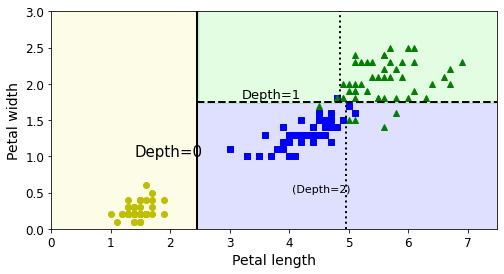

In [9]:
##### YOUR CODE HERE
tree = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree.fit(X, y)

print(tree.score(X,y))

plt.figure(figsize=(8, 4))

plot_decision_boundary(tree, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()


The following cell rotates the data by angle 20

In [10]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

0.9733333333333334


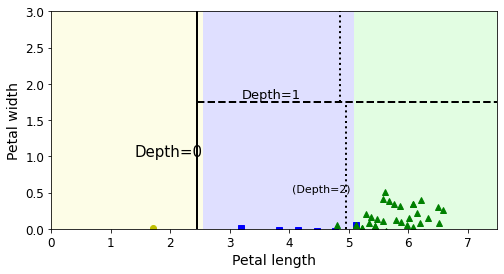

In [11]:
##### YOUR CODE HERE
tree_rotate = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_rotate.fit(Xr, y)

print(tree_rotate.score(Xr,y))

plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_rotate, Xr, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()


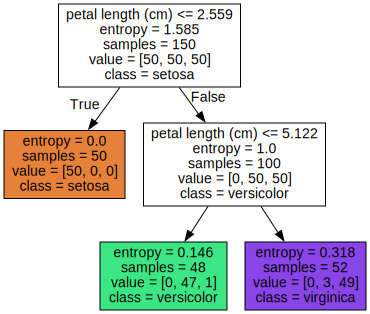

In [23]:
export_graphviz(tree_rotate, out_file="tree_rotate.dot", class_names=iris.target_names,feature_names=iris.feature_names[2:], impurity=True, filled=True)

with open("tree_rotate.dot") as tree:
    graph_rotate = tree.read()
    
Source(graph_rotate)

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [12]:
import numpy as np
def plot_logistic_regression(clf, X, y, axes, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
  
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

0.9666666666666667


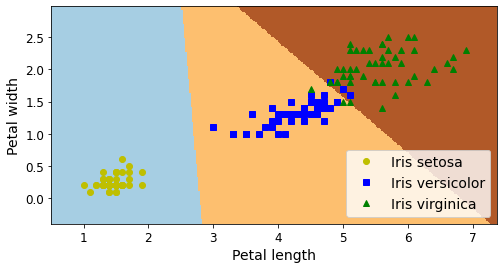

In [13]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)

print(lr.score(X,y))

plt.figure(figsize=(8, 4))

plot_logistic_regression(lr, X, y,[0, 7.5, 0, 3])
plt.show()

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

0.9666666666666667


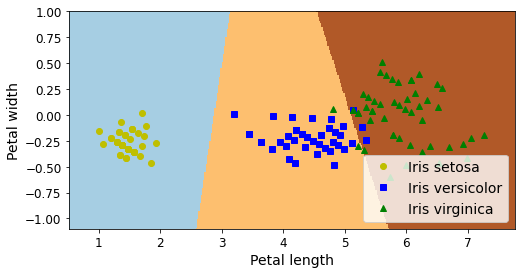

In [14]:
###### YOUR CODE HERE
lr_rotate = LogisticRegression()
lr_rotate.fit(Xr, y)

print(lr_rotate.score(Xr,y))

plt.figure(figsize=(8, 4))

plot_logistic_regression(lr_rotate, Xr, y,[0, 7.5, 0, 3])
plt.show()

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1. - decison tree has higher score to rotated data than original data. the score for original data = 0.96 while for rotated data = 0.973
   - logistic regression has the same score for both original data and rotated data. logistic regression scored 0.976 for both data samples.
2. this happened because in case of decision tree the new built tree has splits the data better as it has entropies of 0.318 and 0.146 in the last nodes. in logistic regression i think nothing changed because both data samples led to similar coefficients, so similar models.

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [15]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=10000, noise=0.4)

2. Split it into a training set and a test set using train_test_split().

In [17]:
from sklearn.model_selection import train_test_split
X,y = moons

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier. 
    - Choose reasonable values for each hyperparameter.

In [18]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':list(range(1,15)),'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42,criterion="entropy"), params, verbose=1, cv=5)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4116 candidates, totalling 20580 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [20]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=47,
                       random_state=42)

4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [21]:
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=47,random_state=42)
best_model.fit(X_train,y_train)

best_model.score(X_test,y_test)

0.866

## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. - the model with max_depth = 2 underfits the training data because the model is very simple and can't fit the points well to get close results
   - the model with max_depth = 5 overfits the data as the graph shows, this model is affected strongly with outliers
   - i think the model with max_depth = 2 is better because it's closer to data points in general and isn't affected with outliers
2. the model with max_depth = 5 has higher variance because the model is complex and overfits the training data
3. the model with max_depth = 2 has higher bias because the model is simpler and slightly underfits the training data

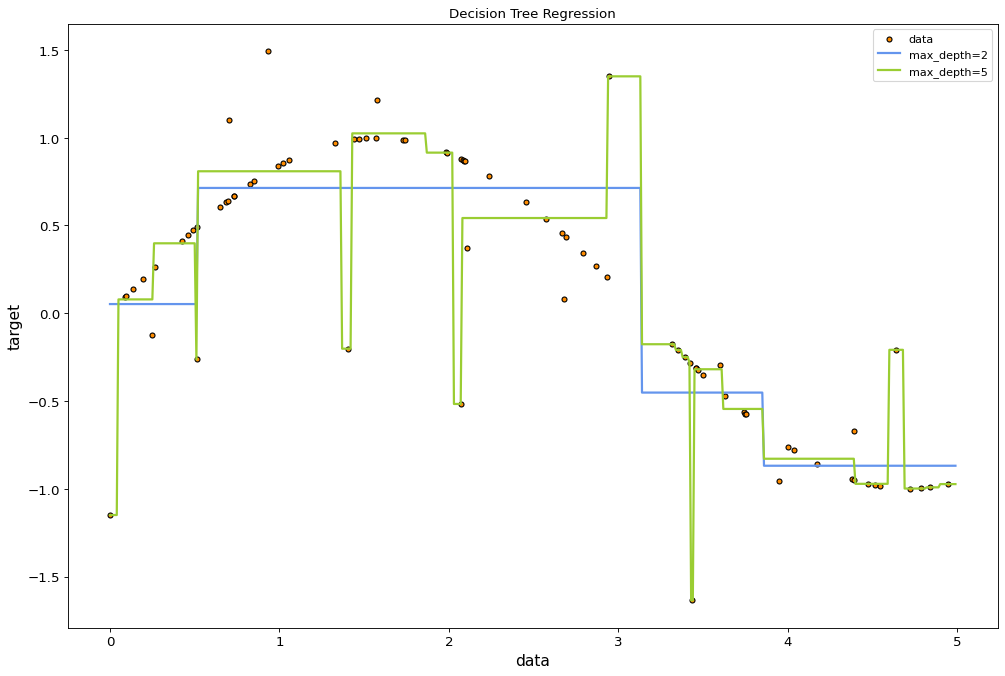

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()